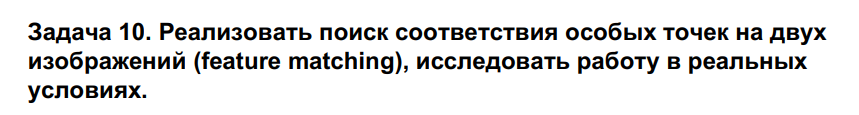

In [29]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img1 = cv.imread('colosseum_1.jpg',cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read"
img2 = cv.imread('colosseum_2.jpg',cv.IMREAD_GRAYSCALE)
assert img1 is not None, "file could not be read"

In [30]:
def bfmatch(img1, img2):
    
    orb = cv.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1,des2)
    matches = sorted(matches, key = lambda x:x.distance)
    
    return matches, kp1, kp2

def draw_bfmatches(img1, img2, kp1, kp2, matches, n_matches=30, fsize=(12,10), cmap='gray'):
    
    img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:n_matches],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=fsize)
    plt.imshow(img3, cmap=cmap)
    plt.xticks([]), plt.yticks([])
    plt.show()

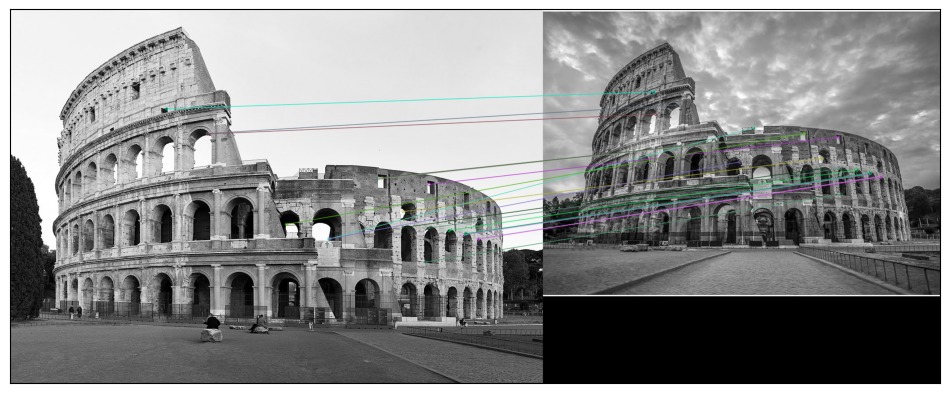

In [31]:
matches, kp1, kp2 = bfmatch(img1, img2)
draw_bfmatches(img1, img2, kp1, kp2, matches, 20)

In [32]:
def flann_match(img1, img2, FLANN_INDEX_KDTREE=1):
    
    sift = cv.SIFT_create()    
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)    
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)
    flann = cv.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)
    
    return matches, kp1, kp2

def draw_flann_matches(img1, img2, kp1, kp2, matches, matchesMask, fsize=(12,10)):
    
    draw_params = dict(matchColor = (255,0,0),
                   singlePointColor = (0,0,255),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
    img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
    
    plt.figure(figsize=fsize)
    plt.imshow(img3, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()

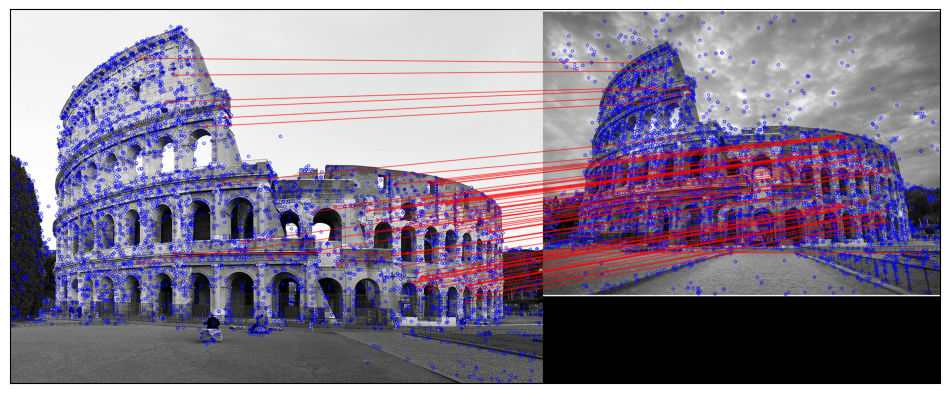

In [33]:
matches, kp1, kp2 = flann_match(img1, img2, 1)
matchesMask = [[0,0] for i in range(len(matches))]
for i,(m,n) in enumerate(matches):
    if m.distance < 0.6*n.distance:
        matchesMask[i]=[1,0]

draw_flann_matches(img1, img2, kp1, kp2, matches, matchesMask)